## 6D Tracking Model

state process

\begin{align}
d\,\begin{bmatrix} x_1\\ x_2 \\ x_3 \\ x_4 \\ x_5 \\x_6 \end{bmatrix}
=\begin{bmatrix} 0 &1 &0 &0 & 0 & 0\\ 0 & 0 & 1 &0 &0  &0 \\ 0 &-w_1^2 &0 & 0& 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 &0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & -w_2^2 & 0 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \end{bmatrix}+ dw(t)
\end{align}

observation process

\begin{align}
d \begin{bmatrix} y_1\\ y_2 \\ y_3\\ y_4 \\ y_5 \\ y_6\end{bmatrix} 
=\begin{bmatrix}\sqrt{x_1^2 + x_4^2}\\ \tan^{-1}\frac{x_4}{x_1}\\ x_2\\ x_3 \\\ x_5\\ x_6  \end{bmatrix}+ \sigma_1 dv(t)
\end{align}

we takte noise follows the Guassian distribution and $w_1=1$ and $w_2=0.5$

In [1]:
import ex6_loader
import ex6_generator
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

dimX=6; N=100; n0=10; eta=0.04; dimY=6

In [2]:
PATH_TRAIN='../data/ex6Train.pklz'

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=ex6_loader.load_data_wrapper(PATH_TRAIN)

test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),dimX)
len(training_data)

16956

### Build Model

In [3]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 128, 64, 32, 8, dimX])
epoch=200

In [4]:
tcMSE_EpochAdalr1, tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0013035370973419106
Epoch 0: 1.0169954027588812
The eta of Epoch 1 is 0.0018865019510044536
Epoch 1: 0.6898090520689777
The eta of Epoch 2 is 0.002113121326314653
Epoch 2: 0.479731823888989
The eta of Epoch 3 is 0.002217956319252894
Epoch 3: 0.3639262184090613
The eta of Epoch 4 is 0.0023093385942483994
Epoch 4: 0.30947616518013477
The eta of Epoch 5 is 0.002351942723087718
Epoch 5: 0.28309643051763395
The eta of Epoch 6 is 0.002392958990914589
Epoch 6: 0.2644844491493889
The eta of Epoch 7 is 0.00241697573389013
Epoch 7: 0.2509560611556139
The eta of Epoch 8 is 0.002463016959599395
Epoch 8: 0.2409913986400556
The eta of Epoch 9 is 0.0024840870230341144
Epoch 9: 0.23248141485285526
The eta of Epoch 10 is 0.002511234298137643
Epoch 10: 0.22544428735988842
The eta of Epoch 11 is 0.0025257253822499985
Epoch 11: 0.21902927357542842
The eta of Epoch 12 is 0.002563913569614367
Epoch 12: 0.21

In [5]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1, constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10, ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 1.0160538369339314
The eta of Epoch 1 is 0.001
Epoch 1: 0.8398136573254485
The eta of Epoch 2 is 0.001
Epoch 2: 0.5945416241176865
The eta of Epoch 3 is 0.001
Epoch 3: 0.49722133135293417
The eta of Epoch 4 is 0.001
Epoch 4: 0.4269709801167613
The eta of Epoch 5 is 0.001
Epoch 5: 0.3767086820283465
The eta of Epoch 6 is 0.001
Epoch 6: 0.34232228296980927
The eta of Epoch 7 is 0.001
Epoch 7: 0.31886190889734595
The eta of Epoch 8 is 0.001
Epoch 8: 0.3026639746819492
The eta of Epoch 9 is 0.001
Epoch 9: 0.290802559923692
The eta of Epoch 10 is 0.001
Epoch 10: 0.28159689166509433
The eta of Epoch 11 is 0.001
Epoch 11: 0.27309914727149526
The eta of Epoch 12 is 0.001
Epoch 12: 0.26572313375322487
The eta of Epoch 13 is 0.001
Epoch 13: 0.259424932917536
The eta of Epoch 14 is 0.001
Epoch 14: 0.25379383446552795
The eta of Epoch 15 is 0.001
Epoch 15: 0.24878075418875928
The

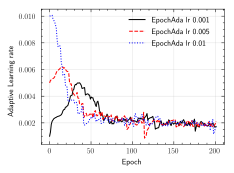

In [6]:
epochs=np.linspace(0,epoch+1,epoch+1)
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(epochs,EpochAdalr1,epochs,EpochAdalr5,epochs, EpochAdalr10)
    plt.grid(alpha=0.35)
    #plt.minorticks_on()
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"], edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive Learning rate")

plt.savefig("../img/ex6-lr.pdf",dpi=600, bbox_inches = 'tight')

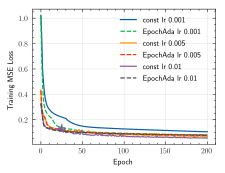

In [7]:
Epochs=np.linspace(0,epoch,epoch)
plt.style.reload_library()
with plt.style.context(['science','ieee','std-colors']):

    plt.plot(Epochs, tcMSE_constlr1,Epochs, tcMSE_EpochAdalr1, '--', Epochs, tcMSE_constlr5,\
        Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10, Epochs,tcMSE_EpochAdalr10,'--',linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],\
        edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Training MSE Loss")

plt.savefig("../img/ex6-loss.pdf", dpi=600,bbox_inches = 'tight')

### Compute relative error

In [11]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label, label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and Relative_error are: {0},{1} resp.".format(mseErr, RelErr))

Repeat 256 times of Monte Carlo to compute the averaged relative errors

In [12]:
import ex6_generator

N_sample=256
TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
for i in range(256):
    datas1, labels1, x_new1=ex6_generator.generate_new_data(data_mean, data_std)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [13]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr10=net.predict(TotalDatas, w_constlr10, b_constlr10, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr10, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

MSE and Relative_error are: 1.910228485425514,0.23106715424950827 resp.
MSE and Relative_error are: 1.901636848506082,0.22822448811607451 resp.
MSE and Relative_error are: 1.976405191509894,0.23196478588645564 resp.
MSE and Relative_error are: 1.8705666347804806,0.2254477374100315 resp.
MSE and Relative_error are: 1.8786490267193485,0.2280393039302403 resp.
MSE and Relative_error are: 1.8999998980031154,0.2249577383962194 resp.


### Plot sample path

According to the evolution of learning rate, it converges around 0.0035.

Then we train the datasets again with the the converged learning rate 0.0035 and use
the trained parameters to draw the sample path.

In [58]:
datas, labels, x_new =ex6_generator.generate_new_data(data_mean, data_std)

In [23]:
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr,constlr\
=net.SGD_Constlr(training_data, epoch, 64, 0.002, evaluation_data=validation_data)

tcMSE_EpochAdalr,tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.002, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.002
The eta of Epoch 0 is 0.002
Epoch 0: 0.7408808376931315
The eta of Epoch 1 is 0.002
Epoch 1: 0.4919183979047688
The eta of Epoch 2 is 0.002
Epoch 2: 0.37436255243061367
The eta of Epoch 3 is 0.002
Epoch 3: 0.3179950360019611
The eta of Epoch 4 is 0.002
Epoch 4: 0.2902203610602687
The eta of Epoch 5 is 0.002
Epoch 5: 0.272122199408546
The eta of Epoch 6 is 0.002
Epoch 6: 0.25906068275746774
The eta of Epoch 7 is 0.002
Epoch 7: 0.24868315602787724
The eta of Epoch 8 is 0.002
Epoch 8: 0.24057410296885626
The eta of Epoch 9 is 0.002
Epoch 9: 0.23403460016825625
The eta of Epoch 10 is 0.002
Epoch 10: 0.2282914726731169
The eta of Epoch 11 is 0.002
Epoch 11: 0.2227363929531738
The eta of Epoch 12 is 0.002
Epoch 12: 0.2179769253514446
The eta of Epoch 13 is 0.002
Epoch 13: 0.21351037566938336
The eta of Epoch 14 is 0.002
Epoch 14: 0.20951636882544766
The eta of Epoch 15 is 0.002
Epoch 15: 0.20510149793477614
Th

make predictions on 'datas' (it is generated in advance.)

In [59]:
x0=np.array([[1],[1],[1],[1],[1],[1]])

pr_const=net.predict(datas,w_constlr, b_constlr,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [60]:
pr_ada=net.predict(datas,w_EpochAdalr, b_EpochAdalr,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

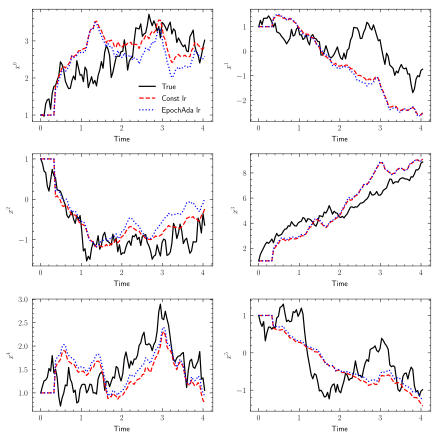

In [61]:
axis=np.linspace(0,eta*(N+1),N+1)
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    fig, ax=plt.subplots(3,2,figsize=(6,6),constrained_layout=True)

    ax[0][0].plot(axis,x_new[:,0],axis,const_new[:,0],axis, ada_new[:,0],linewidth=1.2)
    ax[0][0].minorticks_on()
    ax[0][0].set(xlabel="Time", ylabel="$x^0$")

    ax[0][1].plot(axis,x_new[:,1],axis,const_new[:,1],axis, ada_new[:,1],linewidth=1.2)
    ax[0][1].minorticks_on()
    ax[0][1].set(xlabel="Time", ylabel="$x^1$")

    ax[1][0].plot(axis,x_new[:,2],axis,const_new[:,2],axis, ada_new[:,2],linewidth=1.2)
    ax[1][0].minorticks_on()
    ax[1][0].set(xlabel="Time", ylabel="$x^2$")

    ax[1][1].plot(axis,x_new[:,3],axis,const_new[:,3],axis, ada_new[:,3],linewidth=1.2)
    ax[1][1].minorticks_on()
    ax[1][1].set(xlabel="Time", ylabel="$x^3$")

    ax[2][0].plot(axis,x_new[:,4],axis,const_new[:,4],axis, ada_new[:,4],linewidth=1.2)
    ax[2][0].minorticks_on()
    ax[2][0].set(xlabel="Time", ylabel="$x^4$")

    ax[2][1].plot(axis,x_new[:,5],axis,const_new[:,5],axis, ada_new[:,5],linewidth=1.2)
    ax[2][1].minorticks_on()
    ax[2][1].set(xlabel="Time", ylabel="$x^5$")

    ax[0][0].legend(["True","Const lr","EpochAda lr"],prop={'size':8}, edgecolor="black")

plt.savefig("../img/ex6-path.pdf",dpi=600, bbox_inches = 'tight')

Plot the original sample path only to take a glimsp of the state process

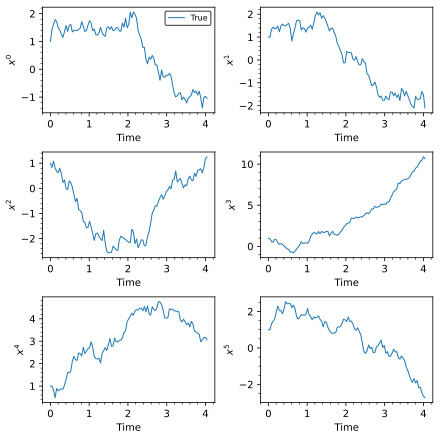

In [8]:
axis=np.linspace(0,eta*(N+1),N+1)
fig, ax=plt.subplots(3,2,figsize=(6,6),constrained_layout=True)

ax[0][0].plot(axis,x_new[:,0],linewidth=1.0)
ax[0][0].minorticks_on()
#ax.grid(alpha=0.35)
ax[0][0].set(xlabel="Time", ylabel="$x^0$")
#--------------------------
ax[0][1].plot(axis,x_new[:,1],linewidth=1.0)
ax[0][1].minorticks_on()
#ax.grid(alpha=0.35)
ax[0][1].set(xlabel="Time", ylabel="$x^1$")

ax[1][0].plot(axis,x_new[:,2],linewidth=1.0)
ax[1][0].minorticks_on()
#ax.grid(alpha=0.35)
ax[1][0].set(xlabel="Time", ylabel="$x^2$")

ax[1][1].plot(axis,x_new[:,3],linewidth=1.0)
ax[1][1].minorticks_on()
ax[1][1].set(xlabel="Time", ylabel="$x^3$")

ax[2][0].plot(axis,x_new[:,4],linewidth=1.0)
ax[2][0].minorticks_on()
ax[2][0].set(xlabel="Time", ylabel="$x^4$")

ax[2][1].plot(axis,x_new[:,5],linewidth=1.0)
ax[2][1].minorticks_on()
ax[2][1].set(xlabel="Time", ylabel="$x^5$")

ax[0][0].legend(["True"],prop={'size':8}, edgecolor="black")

#plt.savefig("../img/ex6-path-org.pdf",dpi=600, bbox_inches="tight")